Mini project on: EDA of Employe churn
 
 By:
 
 1. Simegn Legesse
  
 2. Sandy Om'lniabohs

Facilitator- Mohamed Abd El-Mohsen El-Srogy



PROBLEM STATEMENT

You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company. The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

Create a report that covers the following:
- Which department has the highest employee turnover? Which one has the lowest?
- Investigate which variables seem to be better predictors of employee departure.
- What recommendations would you make regarding ways to reduce employee turnover?

DATASET DESCRIPTION
The dataset contains information about employees in a company accross multiple departments. It contains 9540 rows and 10 columns. The dataset features include:
- Promoted : 1 if the employee was promoted in the past 24 months, otherwise 0

- Review : a score from 0 to 1 assigned to the employee by a supervisor, assessing performance

- Projects : the number of projects the employee is engaged in

- Salary : this ranges from "low" salary, "medium" salary, and "high" salary

- Tenure : the number of (whole) years the employee has been part of the company

- Satisfaction : the self reported score of the employee, ranging from 0 to 1

- Bonus : 1 if the employee received a bonus in the past 24 months, otherwise 0

- Avg_hrs_month : The number of hours the employee has worked per month, on average (a decimal number)
- Left : 1 if the employee quit and 0 if they stayed

Loading libraries

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [ ]:
df=pd.read_csv(r"C:\Users\Gust\Downloads\Python classes\Duplicate_of_What_could_be_prompting_employees_to_leave_\employee_churn_data.csv")

df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


Getting extra information 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB




Checking for null values in each columns

In [ ]:
df.isna().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

Checking for duplicated values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape   

(9540, 10)

The data set has 9540 rows and 10 columns

In [ ]:
#count of employees per department 
df.department.value_counts()

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64

In [ ]:
#percentage of employee turn over(left and stayed)

round(df.left.value_counts()/df.shape[0]*100,0)

no     71.0
yes    29.0
Name: left, dtype: float64

In [ ]:
#Descriptive statistics
round(df.describe(),2)

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.00,9540.00,9540.00,9540.00,9540.00,9540.00,9540.00
mean,0.03,0.65,3.27,6.56,0.50,0.21,184.66
std,0.17,0.09,0.58,1.42,0.16,0.41,4.14
min,0.00,0.31,2.00,2.00,0.00,0.00,171.37
25%,0.00,0.59,3.00,5.00,0.39,0.00,181.47
50%,0.00,0.65,3.00,7.00,0.50,0.00,184.63
75%,0.00,0.71,4.00,8.00,0.62,0.00,187.73
max,1.00,1.00,5.00,12.00,1.00,1.00,200.86


In [ ]:
#changing string data into numeric in the 'left' column
df["left"].replace({'no': 0, 'yes': 1},inplace=True)

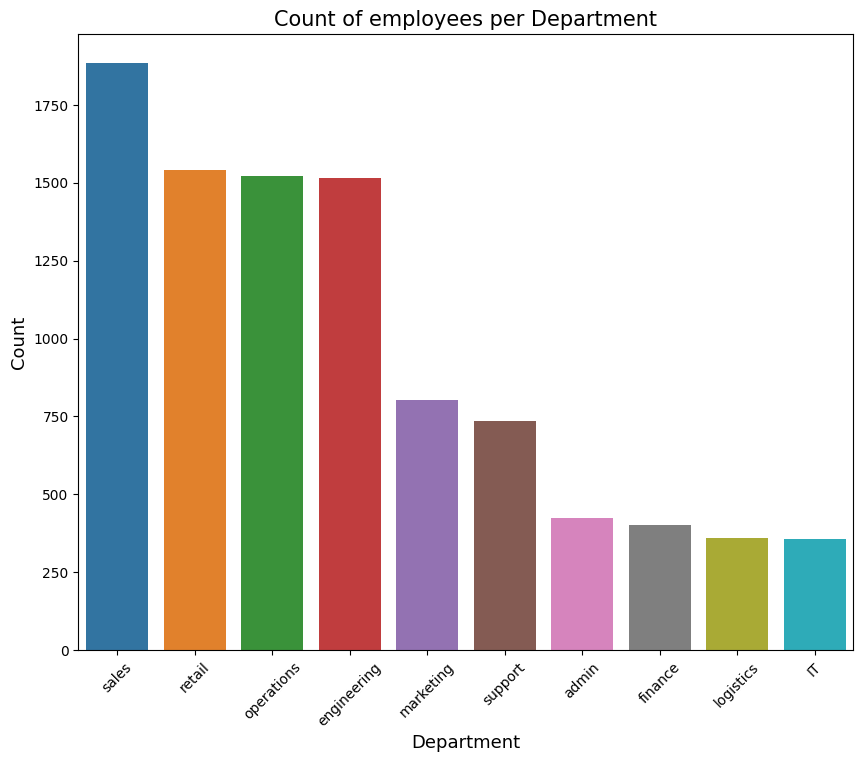

In [ ]:
#plotting count of employee in each department
plt.figure(figsize=(10,8))
sns.countplot(x='department', data=df, order=df.department.value_counts().index)
plt.xlabel('Department',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Count of employees per Department',fontsize=15)
plt.xticks(rotation=45)
plt.show()

Employee Turnover by department

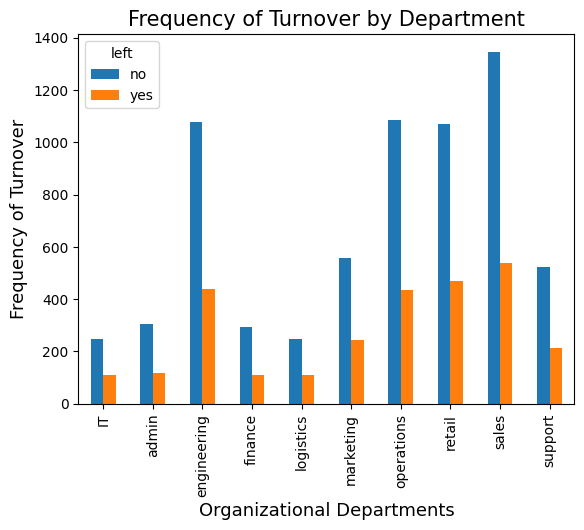

In [ ]:
pd.crosstab(df.department,df.left).plot(kind='bar',)
plt.title('Frequency of Turnover by Department',fontsize=15)
plt.xlabel('Organizational Departments',fontsize=13)
plt.ylabel('Frequency of Turnover',fontsize=13)
plt.show()

1. Which department has the highest employee turnover? Which one has the lowest?

The sales and retail departments have the highest employee turnover whereas finance, IT and logistics departments have the lowest respctively.

In [ ]:
#Are more persons promoted or not?

df.promoted.value_counts()

0    9251
1     289
Name: promoted, dtype: int64

In [ ]:
#proportion of promotion in percent

In [ ]:
round(df.promoted.value_counts()/df.shape[0]*100,0)


0    97.0
1     3.0
Name: promoted, dtype: float64

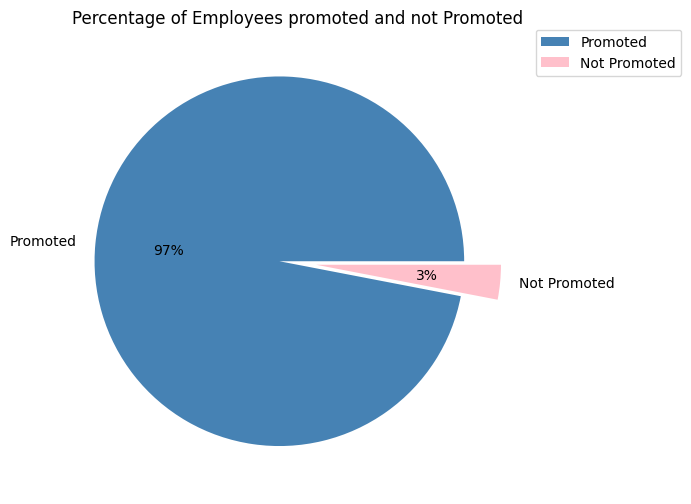

In [ ]:
#plotting a pie chart to show the promoted percentage

labels = 'Promoted', 'Not Promoted'
colors = ['steelblue' , 'pink']
explode = (0.1, 0.1)
plt.figure(figsize=(8,6))
ax = df.promoted.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=colors, explode=explode, labels=labels, legend=True, title="Percentage of Employees promoted and not Promoted")
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')   #moves legend to upper left
ax.set_ylabel('') #hides ylabel legend
plt.show()

In [ ]:
 df.groupby("left")["promoted"].value_counts(normalize=True)*100 

left  promoted
no    0           96.566015
      1            3.433985
yes   0           97.952586
      1            2.047414
Name: promoted, dtype: float64

As we can understand from the above, we can say that from employees who left the organization,almost 98% are not promoted and only 2% are promoted. This indicates that lack of promotion is one of the reason for the employee to leave.

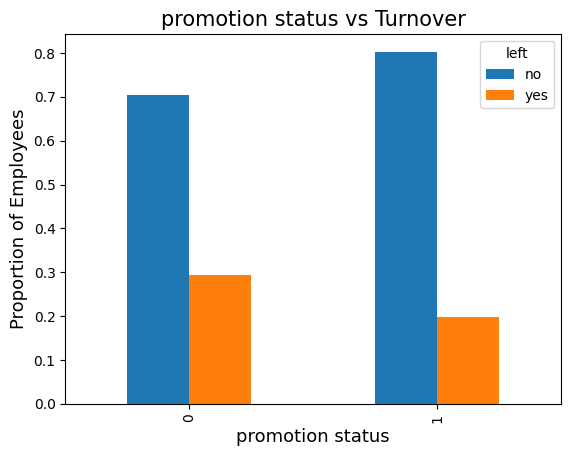

In [ ]:
#Left by promotion

left_by_promotion=pd.crosstab(df.promoted, df.left)
left_by_promotion.div(left_by_promotion.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('promotion status vs Turnover',fontsize=15)
plt.xlabel('promotion status',fontsize=13)
plt.ylabel('Proportion of Employees',fontsize=13)
plt.show()

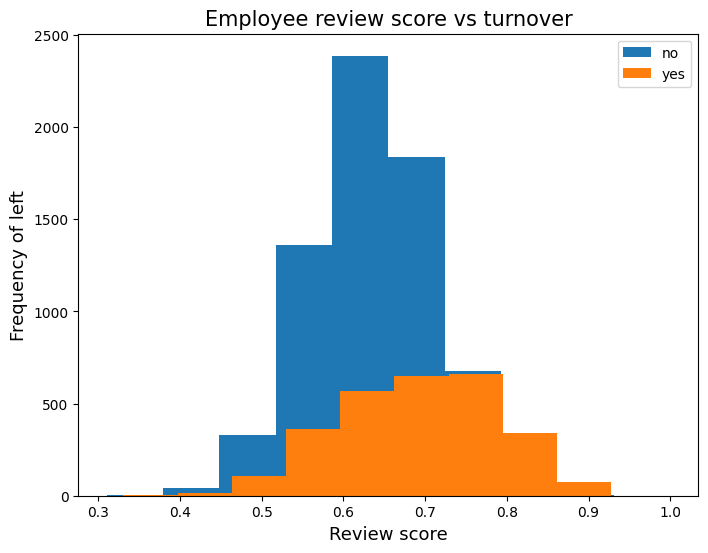

In [ ]:
#review level among employees who left or stayed

plt.figure(figsize=(8,6))
df.groupby('left')['review'].plot.hist()
plt.xlabel('Review score',fontsize=13)
plt.ylabel('Frequency of left',fontsize=13)
plt.title('Employee review score vs turnover',fontsize=15)
plt.legend()
plt.show()


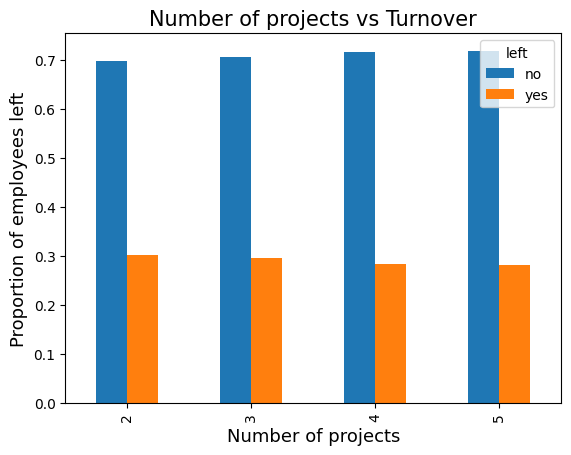

In [ ]:
#frequency of employees left or stayed by number of projects

left_by_projects=pd.crosstab(df.projects, df.left)
left_by_projects.div(left_by_projects.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Number of projects vs Turnover',fontsize=15)
plt.xlabel('Number of projects',fontsize=13)
plt.ylabel('Proportion of employees left',fontsize=13)
plt.show()

The above figure shows that the more an employee participated in more projects,the less he/she left the organization

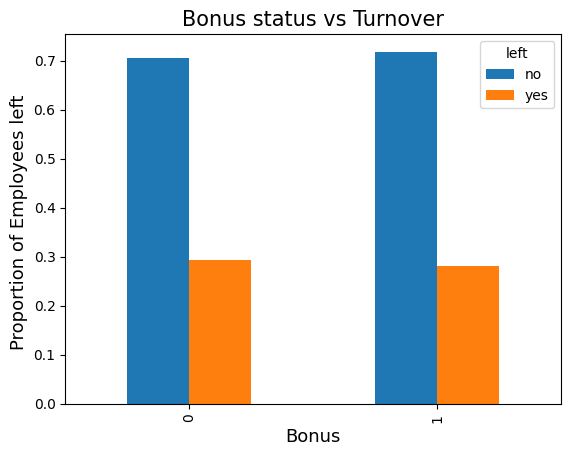

In [ ]:
#Employees Left by bonus 

left_by_bonus=pd.crosstab(df.bonus, df.left)
left_by_bonus.div(left_by_bonus.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Bonus status vs Turnover',fontsize=15)
plt.xlabel('Bonus',fontsize=13)
plt.ylabel('Proportion of Employees left ',fontsize=13)
plt.show()

The above chart shows that the number of employees who recieved a bonus and left are less than number of employees not received bonus and left.That means,availability of bonus can be one reason to be stayed in the organization,

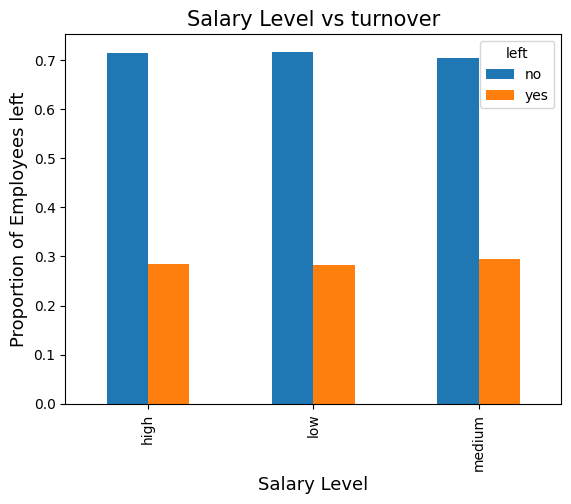

In [ ]:
#Left by salary

left_by_salary=pd.crosstab(df.salary, df.left)
left_by_salary.div(left_by_salary.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Salary Level vs turnover',fontsize=15)
plt.xlabel('Salary Level',fontsize=13)
plt.ylabel('Proportion of Employees left',fontsize=13)
plt.show()

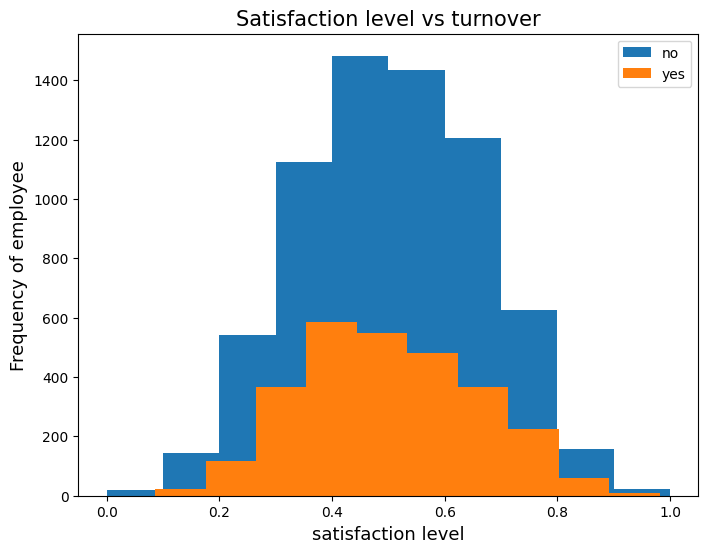

In [ ]:
#Left by Satisfaction

plt.figure(figsize=(8,6))
df.groupby('left')['satisfaction'].plot.hist()
plt.xlabel('satisfaction level',fontsize=13)
plt.ylabel('Frequency of employee',fontsize=13)
plt.title('Satisfaction level vs turnover',fontsize=15)
plt.legend()
plt.show()

If an organization is able to sustain an average satisfaction level from 0.4-0.8,it can save employees a higher number of employes from leaving the organization. 

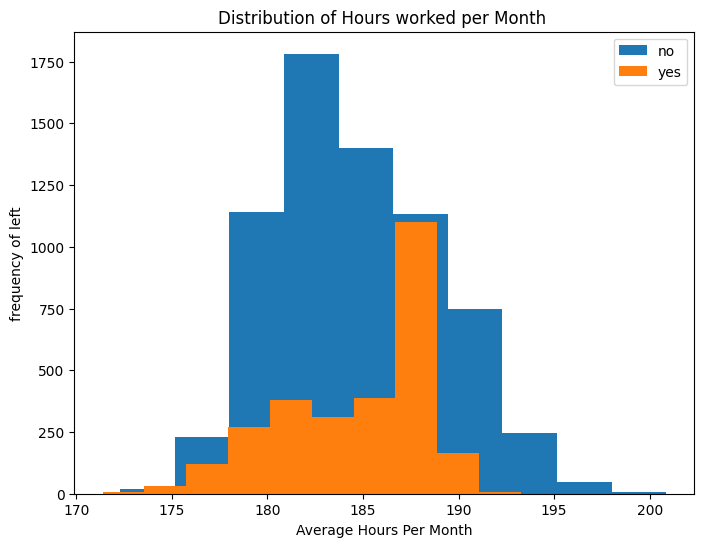

In [ ]:
#Average hours per month distribution among employees who left or stayed

plt.figure(figsize=(8,6))
df.groupby('left')['avg_hrs_month'].plot.hist()
plt.xlabel('Average Hours Per Month')
plt.title('Distribution of Hours worked per Month ')
plt.ylabel('frequency of left')
plt.legend()
plt.show()

From the above chart,we can see that with in the same avaerage working hours per month(180-190),most of the employees have no interest to leave their organization. That means,optimum working hours per month is very important to save employees from leaving.

In [ ]:
# Variables correlation

df.corr()  

C:\Users\Gust\AppData\Local\Temp\ipykernel_22504\3269835871.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000


C:\Users\Gust\AppData\Local\Temp\ipykernel_22504\2750163555.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<AxesSubplot: >

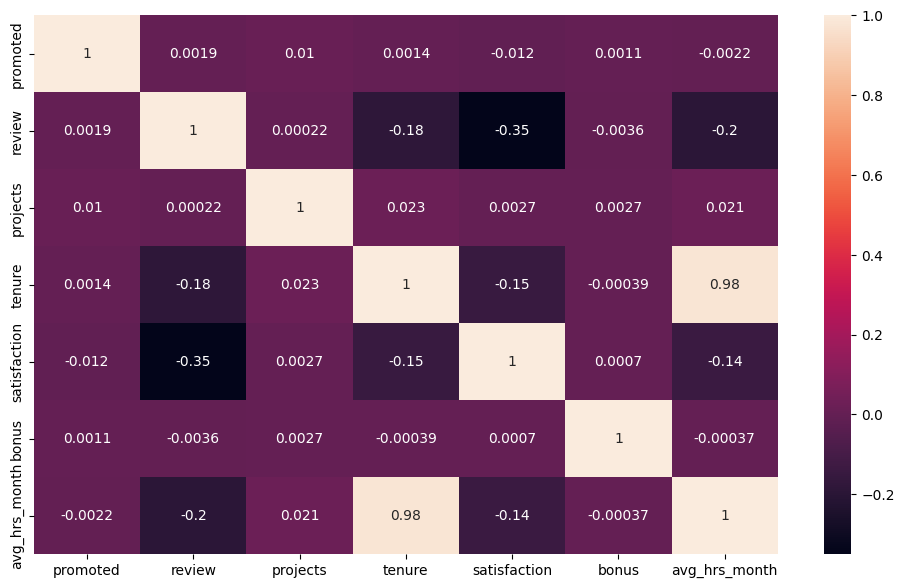

In [ ]:
#correlation heatmap

plt.figure(figsize=(12, 7))
c = df.corr()
sns.heatmap(c, annot=True)

As we can understand from the heatmap,there is high positive correlation between tenure and avg_hrs_month as the more an employee stayed longer period in the organization,the more is average hours per month to work.

 # CONCLUSION
 
- The sales department has the highest employee turnover. This is due to the expansion of business and marketing that creates more opportunities for sales persons.
- The highest employee turn over is seen in people who could not get promotion
- There were a slight variation of Emloyee turnover between paied low, medium and high salary ranges
- Employee's turnover is highly affected by promotion, length of tenure, review score, and average hours worked per month.
- There were also a high positive correlation between tenure and avg_hrs_month as the more an employee stayed longer period in the organization,the more is average hours per month to work.

#LIMITATIONS

Even though the correlation seems weak,we can understand that there is association between the outcome variable(turnover) and other independent variable. We want to identify which variables are the best predictors or significantly affecting employee turnover by obtaining strength of association and p-values. But we are unable to go through because,it needs advanced machine learning lessons that we expect to learn in the future.


#RECOMMENDATIONS

Based on the above conclussions,the following points are forwarded.

- Some of the variables showed a contradictory and unbelievable results,that may be due to the fact dataset lacks completness in considering other important variables such as employement type,age,gender and work place distance from residence.
-Organizations better to focus and work on some rules and guidelines related to promotion,working hours,and seniority advantages.
-In-depth advance analysis is needed to understand some of the unexpected relationships such as the apparently negative one between review score and level of satisfaction.

